# FIFS Sports Big Data Gamethon 2025  

## **Resources**  
Here are key data sources for the competition:  
- **Cricinfo Stats Repository:** [ESPN Cricinfo Stats](https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;type=batting)  
- **Cricsheet:** [Cricsheet.org](https://cricsheet.org/)  

---

## **Overview**  
The **FIFS Sports Big Data Gamethon 2025** is an AI/ML-powered competition that challenges participants to develop predictive models for **fantasy cricket team selection** during the **ICC Champions Trophy 2025** (Feb 19 - Mar 9, 2025). The goal is to maximize **fantasy points** across all matches by selecting optimal teams based on historical performance, match conditions, and real-time constraints.  

---

## **Objectives of this Notebook**  
This notebook serves as an **introduction to the competition**, outlining the **rules, constraints, and evaluation criteria**. It also lays the foundation for data collection, feature engineering, and model development.  

### **Key Goals**  
- Understand the **gameplay rules** for team selection, budget constraints, and scoring system.  
- Identify the **factors influencing player selection**, such as form, venue, and match conditions.  
- Outline the strategy for **building an AI/ML model** to optimize fantasy team selection.  

---

## **Gameplay Rules & Constraints**  

<details>
  <summary>Team Composition (Click to expand)</summary>  

- A fantasy team consists of **11 players**, matching real-life teams.  
- Each team must include **at least 1 player from both competing teams** in a match.  
- The team must have **at least one player from each category**:  
  - **Wicketkeepers (WK)**  
  - **Batters (BAT)**  
  - **All-rounders (AR)**  
  - **Bowlers (BOWL)**  

</details>  

<details>
  <summary>Budget & Player Credits (Click to expand) </summary>  

- Every player is assigned a **credit value** based on their performance and demand.  
- Participants are given a **budget of 100 player credits** to select their **11 players**.  

</details>  

<details>
  <summary>Backups & Player Replacements (Click to expand) </summary>  

- Participants can select **up to 4 backup players** in case a selected player is not in the final playing XI.  
- Backup players will **only replace non-announced players** and must satisfy all **team composition rules**.  
- ⚠️ Example: If you only select **one bowler** and they are dropped from the playing XI, but none of your backups are bowlers, then the team selection will be invalid.  

</details>  

<details>
  <summary>Fantasy Points System (Click to expand) </summary>  

- Players earn points based on their **match performance** (batting, bowling, fielding).  
- The **official scoring system** for the ICC Champions Trophy can be found **[here](https://www.dream11.com/games/fantasy-cricket/how-to-play?ln=en-US)** under the **One Day (OD) tab**.  

</details>  

---

## **📊 Data Provided**  

<details>
  <summary>Data Sources & Availability (Click to expand) </summary>  

1. **Cricinfo Stats Repository** → [Link](https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;type=batting)  
2. **Cricsheet** → [Link](https://cricsheet.org/) 

</details>  

---

## **Expected Outcomes**  
By the end of this project, we aim to:  
**Understand the constraints and optimize team selection strategies.**  
**Analyze historical data to extract meaningful player performance trends.**  
**Develop an AI/ML-based model to predict and select the best teams dynamically.**  
**Ensure compliance with fantasy cricket rules while maximizing points.**  

This introduction sets the foundation for our data-driven approach to **fantasy cricket optimization**.

In [11]:
import os
import json
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv("data/matches.csv")

In [14]:
df.head(3)

,match_id,created,city,dates,event_name,match_number,gender,match_type,match_type_number,toss_winner,toss_decision,outcome_winner,outcome_by_runs,outcome_by_wickets,overs,player_of_match,season,teams,venue,total_fours,total_sixes
0,1387601,2023-12-19,Gqeberha,2023-12-19,India tour of South Africa,2.0,male,ODI,4714,South Africa,field,South Africa,NaN,8.0,50,T de Zorzi,2023/24,"India, South Africa","St George's Park, Gqeberha",41,10
1,467883,2010-11-29,Guwahati,2010-11-28,New Zealand in India ODI Series,1.0,male,ODI,3070,New Zealand,field,India,40.0,NaN,50,V Kohli,2010/11,"India, New Zealand",Nehru Stadium,53,6
2,351689,2013-03-04,Perth,2009-02-01,Chappell-Hadlee Trophy,1.0,male,ODI,2811,Australia,bat,New Zealand,NaN,2.0,50,KD Mills,2008/09,"Australia, New Zealand",Western Australia Cricket Association Ground,25,4


In [15]:
df.loc[:, 'created'] = pd.to_datetime(df['created'])

In [16]:
df.head(3)

,match_id,created,city,dates,event_name,match_number,gender,match_type,match_type_number,toss_winner,toss_decision,outcome_winner,outcome_by_runs,outcome_by_wickets,overs,player_of_match,season,teams,venue,total_fours,total_sixes
0,1387601,2023-12-19 00:00:00,Gqeberha,2023-12-19,India tour of South Africa,2.0,male,ODI,4714,South Africa,field,South Africa,NaN,8.0,50,T de Zorzi,2023/24,"India, South Africa","St George's Park, Gqeberha",41,10
1,467883,2010-11-29 00:00:00,Guwahati,2010-11-28,New Zealand in India ODI Series,1.0,male,ODI,3070,New Zealand,field,India,40.0,NaN,50,V Kohli,2010/11,"India, New Zealand",Nehru Stadium,53,6
2,351689,2013-03-04 00:00:00,Perth,2009-02-01,Chappell-Hadlee Trophy,1.0,male,ODI,2811,Australia,bat,New Zealand,NaN,2.0,50,KD Mills,2008/09,"Australia, New Zealand",Western Australia Cricket Association Ground,25,4


In [17]:
df.shape

(2400, 21)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            2400 non-null   int64  
 1   created             2400 non-null   object 
 2   city                2119 non-null   object 
 3   dates               2400 non-null   object 
 4   event_name          2386 non-null   object 
 5   match_number        2290 non-null   float64
 6   gender              2400 non-null   object 
 7   match_type          2400 non-null   object 
 8   match_type_number   2400 non-null   int64  
 9   toss_winner         2400 non-null   object 
 10  toss_decision       2400 non-null   object 
 11  outcome_winner      2277 non-null   object 
 12  outcome_by_runs     1107 non-null   float64
 13  outcome_by_wickets  1170 non-null   float64
 14  overs               2400 non-null   int64  
 15  player_of_match     2258 non-null   object 
 16  season

# Player stats

| **Feature**                            | **Description**                                                  |
| -------------------------------------- | ---------------------------------------------------------------- |
| **Player Name**                        | Name of the player                                               |
| **Match ID**                           | Unique match identifier                                          |
| **Team**                               | Team of the player                                               |
| **Runs Scored (`runs`)**               | Total runs scored by the player                                  |
| **Balls Faced (`balls_faced`)**        | Number of balls faced by the player                              |
| **Fours (`fours`)**                    | Number of fours hit by the player                                |
| **Sixes (`sixes`)**                    | Number of sixes hit by the player                                |
| **Strike Rate (`strike_rate`)**        | Batting strike rate (calculated)                                 |
| **Wickets Taken (`wickets`)**          | Number of wickets taken by the bowler                            |
| **Maiden Over (`maiden`)**             | Number of overs in which no runs are scored                      |
| **Overs Bowled (`overs_bowled`)**      | Number of overs bowled by the player                             |
| **Balls Bowled (`balls_bowled`)**      | Total balls bowled by the player                                 |
| **Runs Conceded (`runs_conceded`)**    | Runs conceded by the bowler                                      |
| **Economy Rate (`economy`)**           | Bowling economy rate (calculated)                                |
| **Catches (`catches`)**                | Number of catches taken by the player                            |
| **Run Outs (`run_outs`)**              | Number of run outs contributed by the player (if available)      |
| **Match Outcome (`match_outcome`)**    | Whether the player’s team won or lost (win/loss)                 |
| **Player Role (Captain/Vice-Captain)** | Whether the player is a captain, vice-captain, or regular player |


In [19]:
players_detailed_stats = pd.read_csv('data/players.csv')

In [20]:
# players_detailed_stats.head(50)
players_detailed_stats.head()

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,run_outs,maiden,stumps,match_outcome,opposition_team,strike_rate,economy,fantasy_points,venue
0,792295,RG Sharma,India,264,176,33,9,0,0,0,0,0,0,0,0,win,Sri Lanka,150.00,0.00,540,Eden Gardens
1,656427,CH Gayle,West Indies,215,151,10,16,2,6,38,32,1,0,0,0,win,Zimbabwe,142.38,5.05,511,Manuka Oval
2,656489,MJ Guptill,New Zealand,237,166,24,11,0,0,0,0,2,0,0,0,win,West Indies,142.77,0.00,505,Westpac Stadium
3,503364,SR Watson,Australia,185,97,15,15,1,7,42,35,2,0,0,0,win,Bangladesh,190.72,5.00,480,Shere Bangla National Stadium
4,1340847,Ishan Kishan,India,210,133,24,10,0,0,0,0,0,0,0,0,win,Bangladesh,157.89,0.00,456,"Zahur Ahmed Chowdhury Stadium, Chattogram"


In [21]:
players_detailed_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52031 entries, 0 to 52030
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         52031 non-null  int64  
 1   player           52031 non-null  object 
 2   team             52031 non-null  object 
 3   runs             52031 non-null  int64  
 4   balls_faced      52031 non-null  int64  
 5   fours            52031 non-null  int64  
 6   sixes            52031 non-null  int64  
 7   wickets          52031 non-null  int64  
 8   overs_bowled     52031 non-null  int64  
 9   balls_bowled     52031 non-null  int64  
 10  runs_conceded    52031 non-null  int64  
 11  catches          52031 non-null  int64  
 12  run_outs         52031 non-null  int64  
 13  maiden           52031 non-null  int64  
 14  stumps           52031 non-null  int64  
 15  match_outcome    52031 non-null  object 
 16  opposition_team  52031 non-null  object 
 17  strike_rate 

In [22]:
players_detailed_stats.shape

(52031, 21)

In [23]:
len(set(players_detailed_stats["match_id"]))

2400

# Data analysis

In [24]:
!pip3 install seaborn matplotlib -q

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

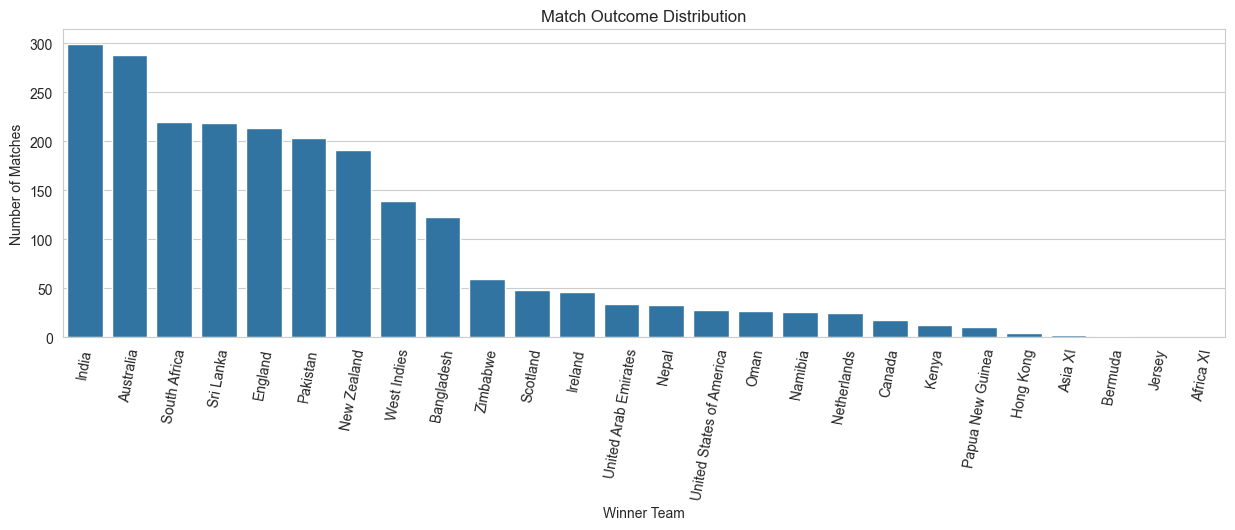

In [61]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='outcome_winner', order=df['outcome_winner'].value_counts().index)
plt.title('Match Outcome Distribution')
plt.ylabel('Number of Matches')
plt.xlabel('Winner Team')
plt.xticks(rotation=80)
plt.show()

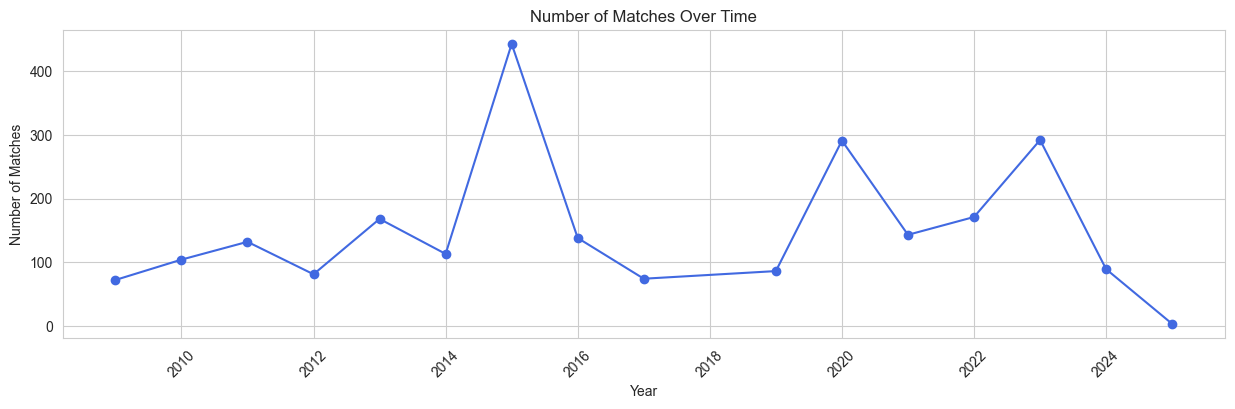

In [62]:
df['created'] = pd.to_datetime(df['created'])

# Match count over time (by year)
plt.figure(figsize=(15, 4))
df.groupby(df['created'].dt.year)['match_id'].count().plot(kind='line', color='royalblue', marker='o')
plt.title('Number of Matches Over Time')
plt.ylabel('Number of Matches')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

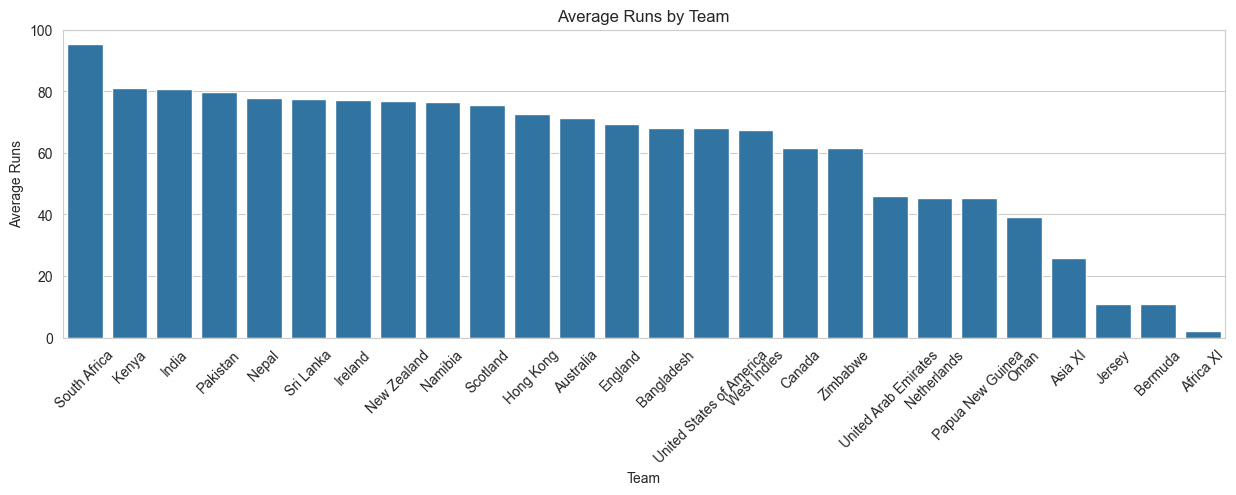

In [64]:
plt.figure(figsize=(15, 4))
team_avg_runs = df.groupby('outcome_winner')['outcome_by_runs'].mean().sort_values(ascending=False)
sns.barplot(x=team_avg_runs.index, y=team_avg_runs.values)
plt.title('Average Runs by Team')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

In [30]:
teams = df['teams'].str.split(', ', expand=True).stack().unique()
team_stats = {team: {'matches_played': 0, 'tosses_won': 0, 'matches_won': 0} for team in teams}

In [31]:
for index, row in df.iterrows():
    teams_in_match = row['teams'].split(', ')
    for team in teams_in_match:
        team_stats[team]['matches_played'] += 1
        
        if row['toss_winner'] == team:
            team_stats[team]['tosses_won'] += 1
        
        if row['outcome_winner'] == team:
            team_stats[team]['matches_won'] += 1

In [32]:
matches_df = pd.DataFrame.from_dict(team_stats, orient='index')
matches_df.reset_index(inplace=True)
matches_df.rename(columns={'index': 'team'}, inplace=True)

In [33]:
matches_df = matches_df[['team', 'matches_played', 'tosses_won', 'matches_won']]

matches_df['win_percentage'] = (matches_df['matches_won'] / matches_df['matches_played']) * 100
matches_df['toss_win_percentage'] = (matches_df['tosses_won'] / matches_df['matches_played']) * 100
matches_df['losses'] = matches_df['matches_played'] - matches_df['matches_won']
matches_df['draws'] = df[df['outcome_winner'].isna()]['teams'].apply(lambda x: [team for team in x.split(', ') if team in matches_df['team'].values]).apply(len).sum()  # Adjust this logic as necessary
matches_df['win_to_toss_ratio'] = matches_df['matches_won'] / matches_df['tosses_won'].replace(0, np.nan)

matches_df = matches_df.sort_values(by='win_percentage', ascending=False)

matches_df.head(10)

,team,matches_played,tosses_won,matches_won,win_percentage,toss_win_percentage,losses,draws,win_to_toss_ratio
3,Australia,460,233,288,62.608696,50.652174,172,246,1.236052
24,Asia XI,5,4,3,60.000000,80.000000,2,246,0.750000
0,India,505,246,299,59.207921,48.712871,206,246,1.215447
1,South Africa,373,193,220,58.981233,51.742627,153,246,1.139896
2,New Zealand,370,183,191,51.621622,49.459459,179,246,1.043716
15,Pakistan,396,195,203,51.262626,49.242424,193,246,1.041026
14,England,424,210,214,50.471698,49.528302,210,246,1.019048
20,Oman,55,29,27,49.090909,52.727273,28,246,0.931034
4,Nepal,68,38,33,48.529412,55.882353,35,246,0.868421
19,Scotland,99,46,48,48.484848,46.464646,51,246,1.043478


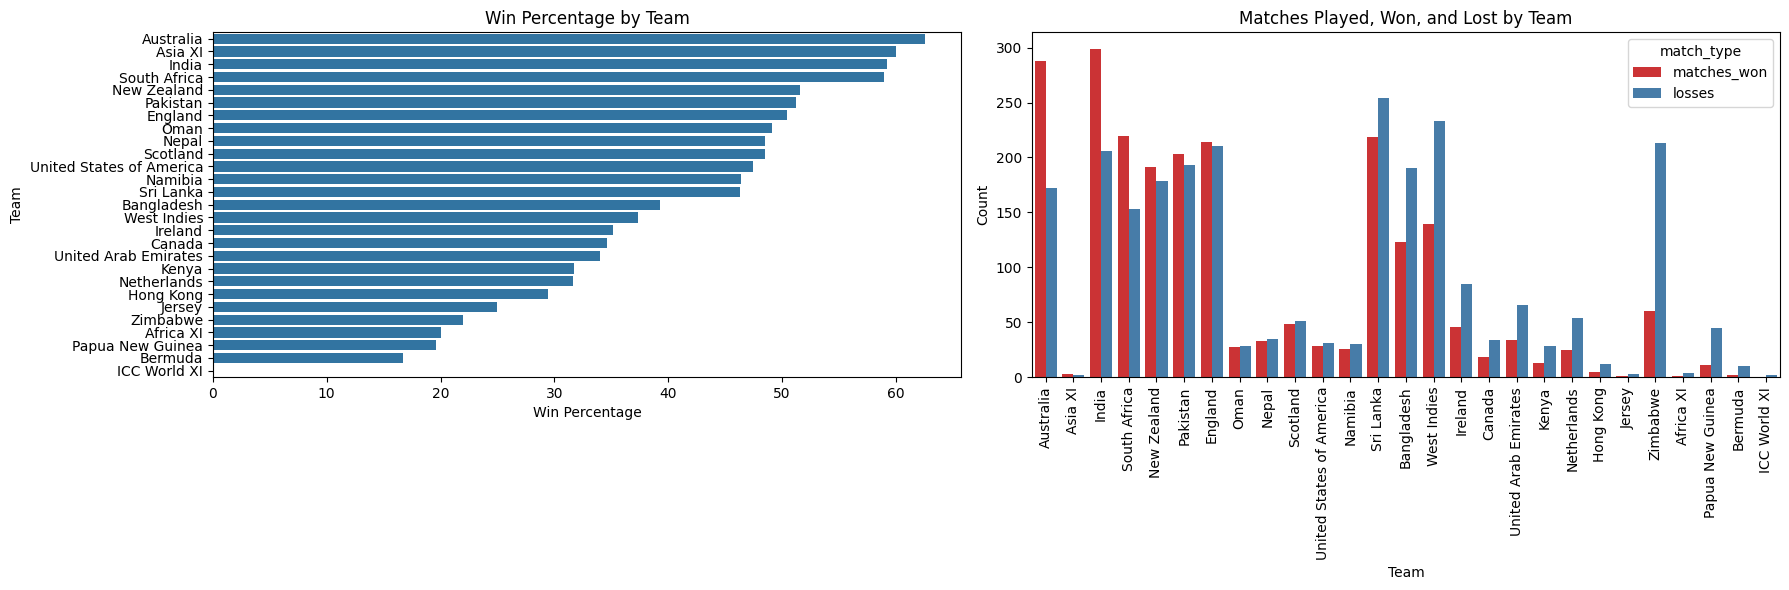

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=matches_df, y='team', x='win_percentage', ax=axes[0])
axes[0].set_title('Win Percentage by Team')
axes[0].set_xlabel('Win Percentage')
axes[0].set_ylabel('Team')

df_melted = matches_df.melt(id_vars='team', value_vars=['matches_won', 'losses'], var_name='match_type', value_name='count')
sns.barplot(data=df_melted, x='team', y='count', hue='match_type', palette='Set1', ax=axes[1])
axes[1].set_title('Matches Played, Won, and Lost by Team')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Player analysis

In [40]:
batter_df = pd.read_csv('data/stats/batter_player_stats.csv')
bowler_df = pd.read_csv('data/stats/bowler_player_stats.csv')

In [41]:
batter_df.head()

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average
0,V Kohli,Batter,13784,91.703812,15031,7,681,671,579,579,0,360,219,41,India,1969.142857
1,KC Sangakkara,Batter,11618,79.390461,14634,0,0,0,510,510,0,237,273,26,Sri Lanka,NaN
2,RG Sharma,Batter,10646,90.358173,11782,11,538,614,577,577,0,358,219,23,India,967.818182
3,MS Dhoni,Batter,10274,84.979322,12090,1,32,38,575,575,0,356,219,20,India,10274.000000
4,AB de Villiers,Batter,9435,99.441400,9488,7,205,201,466,466,0,286,180,26,South Africa,1347.857143


In [42]:
bowler_df.head()

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,economy_rate,average
0,JPR Lamsam,Bowler,16,53.333333,30,0,27,12,218,0,218,126,92,0,India,2.250000,NaN
1,BJ Diamanti,Bowler,26,113.043478,23,0,25,12,494,0,494,346,148,0,Australia,2.083333,NaN
2,K Christie,Bowler,0,0.000000,3,0,18,9,36,0,36,7,29,0,Papua New Guinea,2.000000,NaN
3,LC Boylan,Bowler,31,65.957447,47,2,37,19,193,0,193,124,69,0,South Africa,1.947368,18.5
4,J Blades,Bowler,0,0.000000,0,0,73,39,190,0,190,70,120,0,Bangladesh,1.871795,NaN


## Batters analysis

In [43]:
sns.set_style('whitegrid')

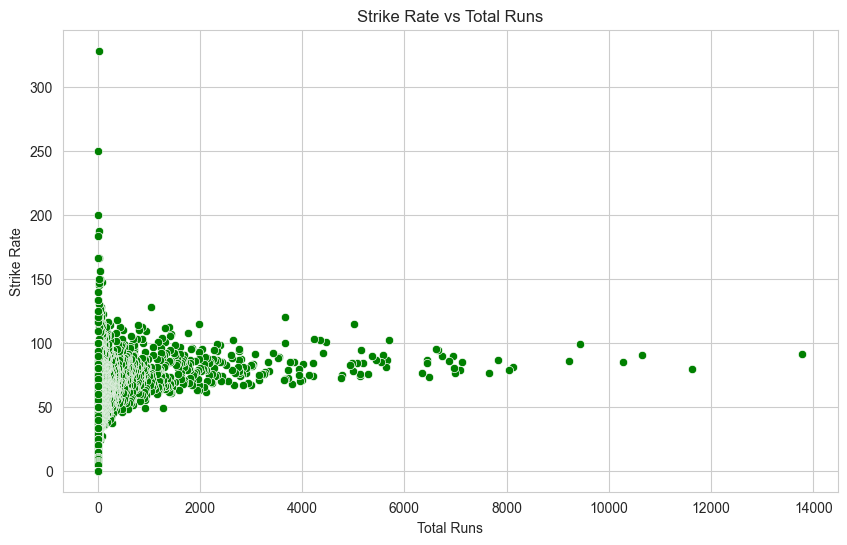

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_runs', y='strike_rate', data=batter_df, color='green')
plt.title('Strike Rate vs Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.show()

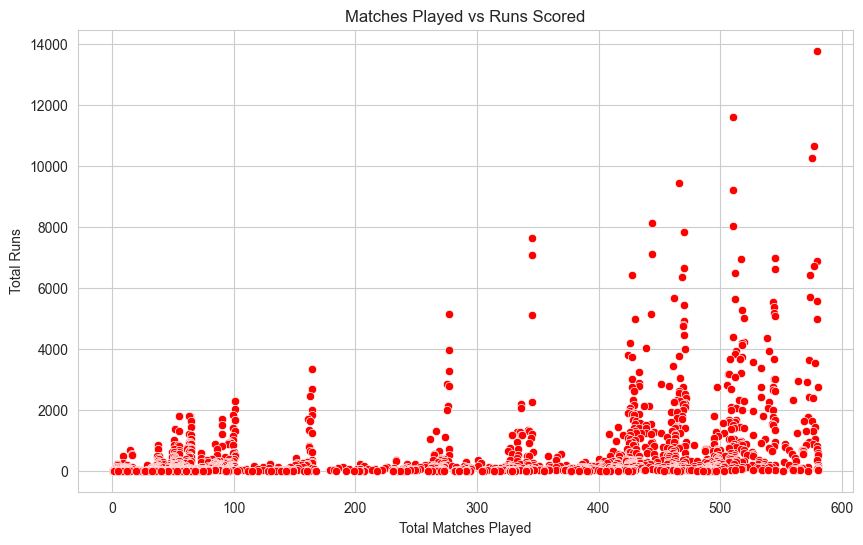

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_matches_played', y='total_runs', data=batter_df, color='red')
plt.title('Matches Played vs Runs Scored')
plt.xlabel('Total Matches Played')
plt.ylabel('Total Runs')
plt.show()

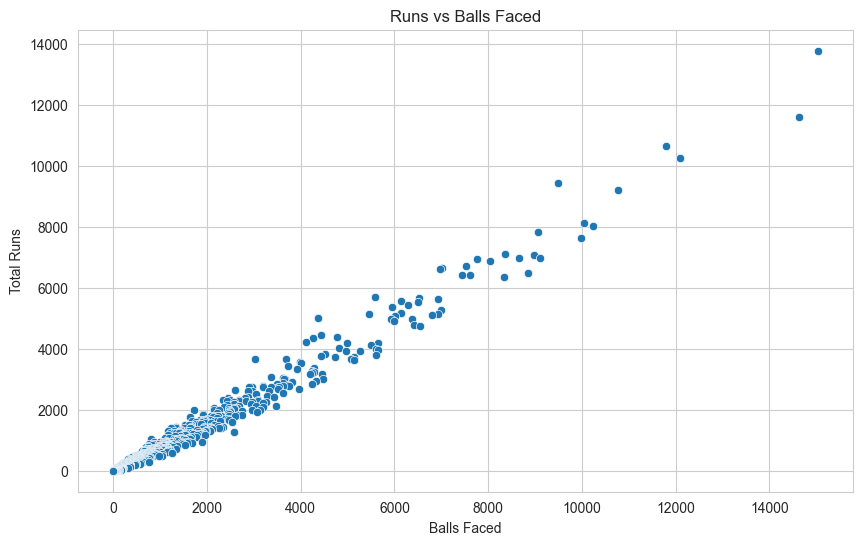

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_balls_faced', y='total_runs', data=batter_df)
plt.title('Runs vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Total Runs')
plt.show()

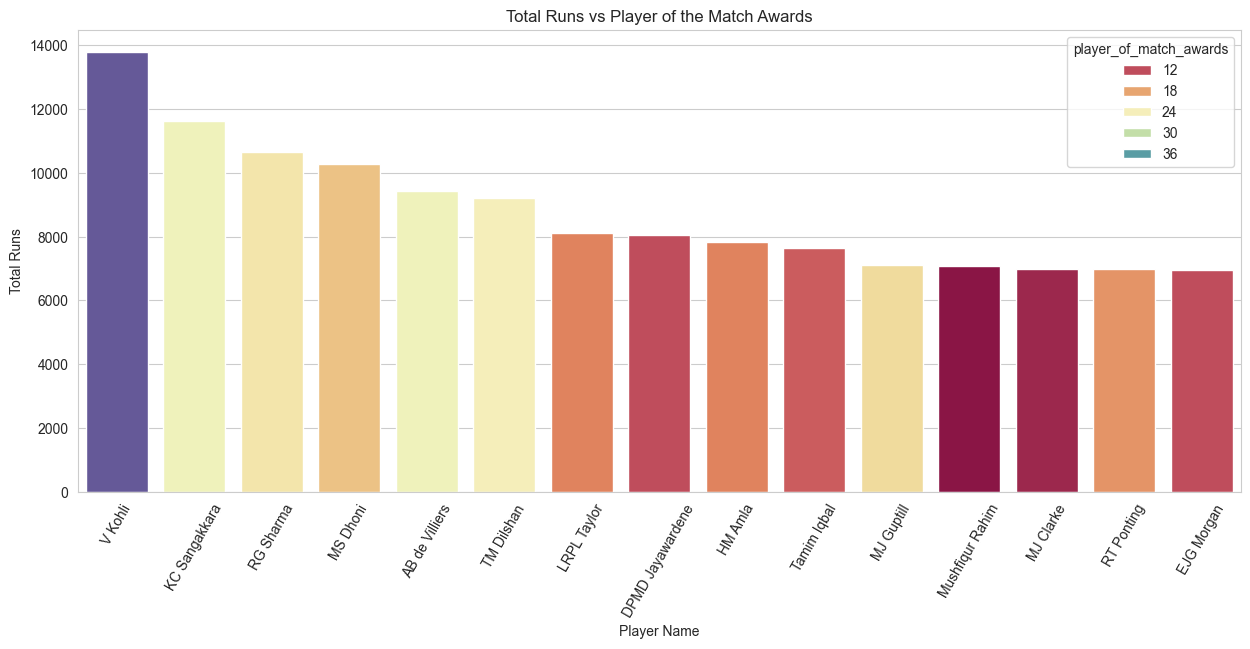

In [47]:
plt.figure(figsize=(15, 6))
sns.barplot(x='player_name', y='total_runs', data=batter_df.sort_values(by='total_runs', ascending=False).head(15), hue='player_of_match_awards', palette='Spectral')
plt.title('Total Runs vs Player of the Match Awards')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.xticks(rotation=60)
plt.show()

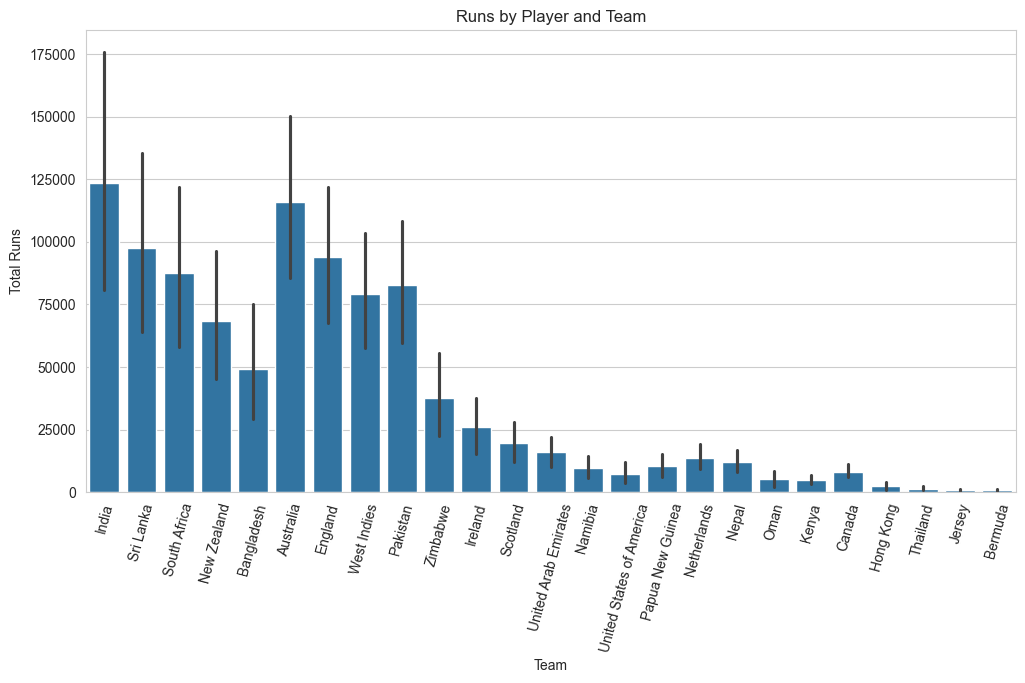

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='total_runs', data=batter_df, estimator='sum')
plt.title('Runs by Player and Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=75)
plt.show()

# Maths analysis

In [49]:
df.sort_values(by='outcome_by_runs', ascending=False).head()

,match_id,created,city,dates,event_name,match_number,gender,match_type,match_type_number,toss_winner,toss_decision,outcome_winner,outcome_by_runs,outcome_by_wickets,overs,player_of_match,season,teams,venue,total_fours,total_sixes
1004,1348645,2023-01-17,Thiruvananthapuram,2023-01-15,Sri Lanka tour of India,3.0,male,ODI,4505,India,bat,India,317.0,NaN,50,V Kohli,2022/23,"India, Sri Lanka","Greenfield International Stadium, Thiruvananth...",43,14
1565,1384415,2023-10-26,Delhi,2023-10-25,ICC Cricket World Cup,24.0,male,ODI,4681,Australia,bat,Australia,309.0,NaN,50,GJ Maxwell,2023/24,"Australia, Netherlands","Arun Jaitley Stadium, Delhi",55,15
1272,1377762,2023-06-26,Harare,2023-06-26,ICC Cricket World Cup Qualifier,17.0,male,ODI,4601,United States of America,field,Zimbabwe,304.0,NaN,50,SC Williams,2023,"Zimbabwe, United States of America",Harare Sports Club,47,15
2063,1384424,2023-11-04,Mumbai,2023-11-02,ICC Cricket World Cup,33.0,male,ODI,4690,Sri Lanka,field,India,302.0,NaN,50,Mohammed Shami,2023/24,"India, Sri Lanka","Wankhede Stadium, Mumbai",37,9
1423,463145,2010-11-16,Benoni,2010-10-22,Zimbabwe in South Africa ODI Series,3.0,male,ODI,3061,South Africa,bat,South Africa,272.0,NaN,50,JP Duminy,2010/11,"South Africa, Zimbabwe",Willowmoore Park,39,18


In [50]:
ids = list(df.sort_values(by='outcome_by_runs', ascending=False).head(5)["match_id"])
ids

[1348645, 1384415, 1377762, 1384424, 463145]

In [51]:
def plot_match_runs_and_wickets(match_id):
    """
    Plots a line chart of cumulative runs scored by both teams in a match and marks wickets with red dots.

    Parameters:
    - match_id (str or int): The ID of the match to plot.
    """
    csv_file_path = os.path.join(csv_folder, f"{match_id}.csv")
    
    if not os.path.exists(csv_file_path):
        print(f"Error: CSV file for match ID {match_id} not found in the folder {csv_folder}.")
        return
    
    df = pd.read_csv(csv_file_path)
    
    teams = df['team'].unique()
    
    plt.figure(figsize=(18, 6))
    ax = plt.gca()
    
    for team in teams:
        team_df = df[df['team'] == team].copy()
        team_df['cumulative_runs'] = team_df['runs_total'].cumsum()
        ax.plot(team_df.index, team_df['cumulative_runs'], label=f'{team} Cumulative Runs')
        
        # Mark wickets with red dots
        wickets = team_df[pd.notna(team_df['wicket_kind'])]
        ax.scatter(wickets.index, wickets['cumulative_runs'], color='red', label='Wicket' if team == teams[0] else "")
    
    ax.set_xlabel('Ball Number')
    ax.set_ylabel('Cumulative Runs')
    ax.set_title(f'Match ID {match_id}: Runs Scored and Wickets')
    
    ax.legend(loc='upper left')
    plt.show()

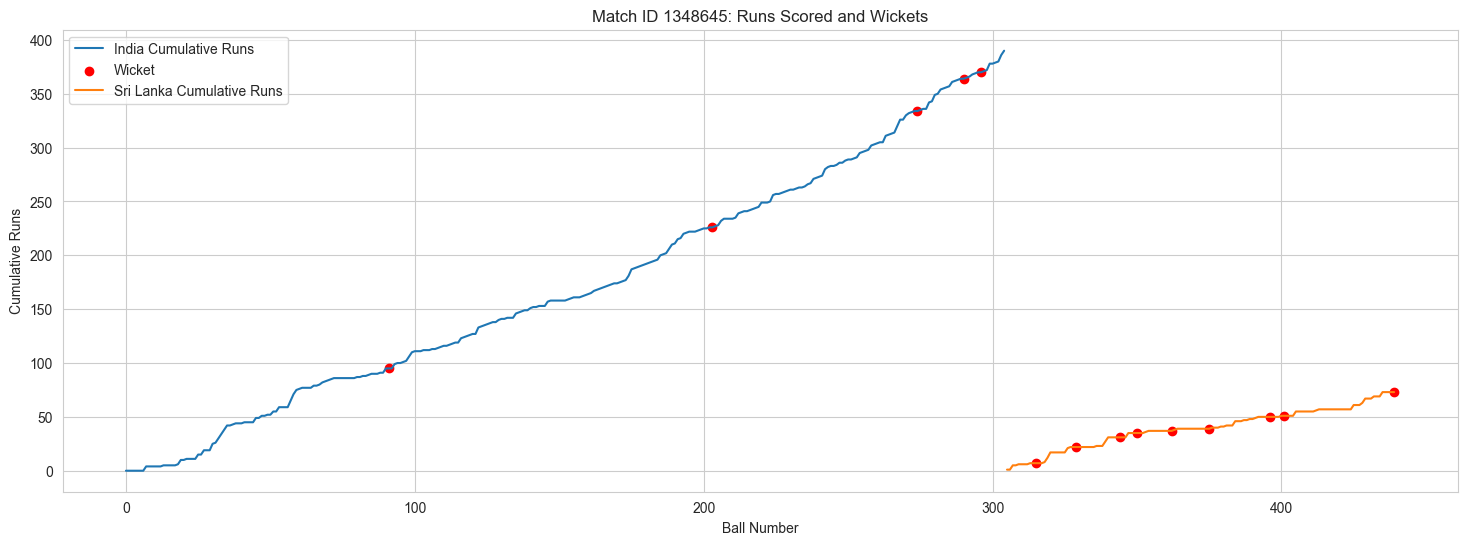

In [52]:
plot_match_runs_and_wickets(ids[0])

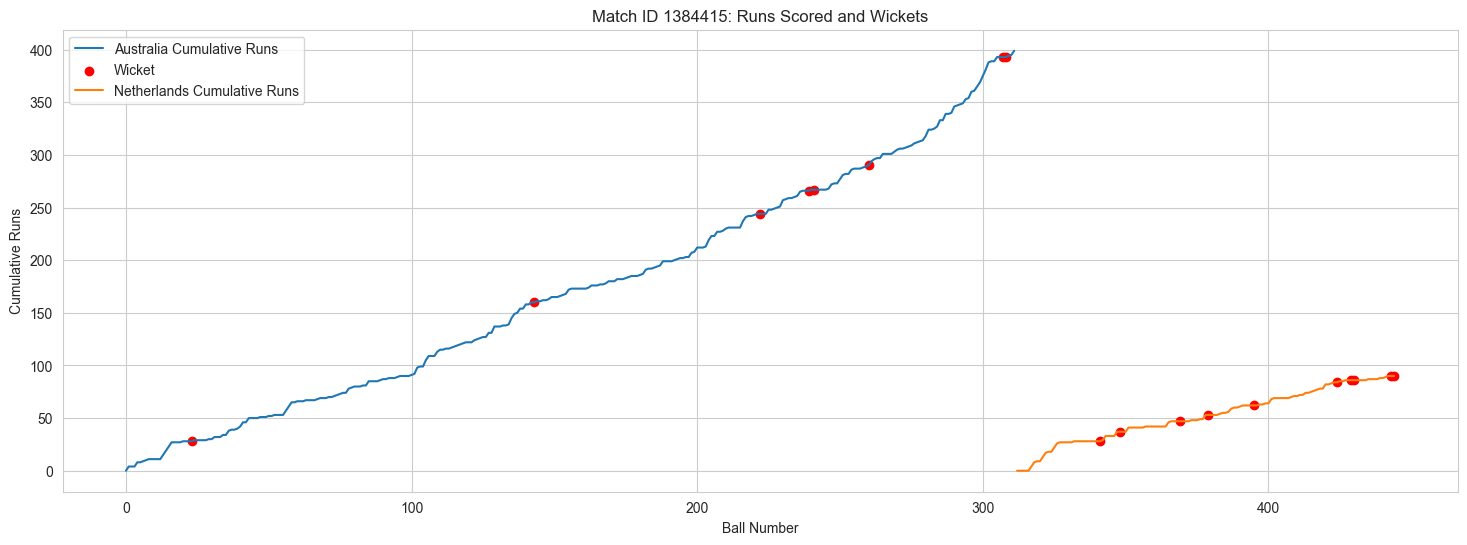

In [53]:
plot_match_runs_and_wickets(ids[1])

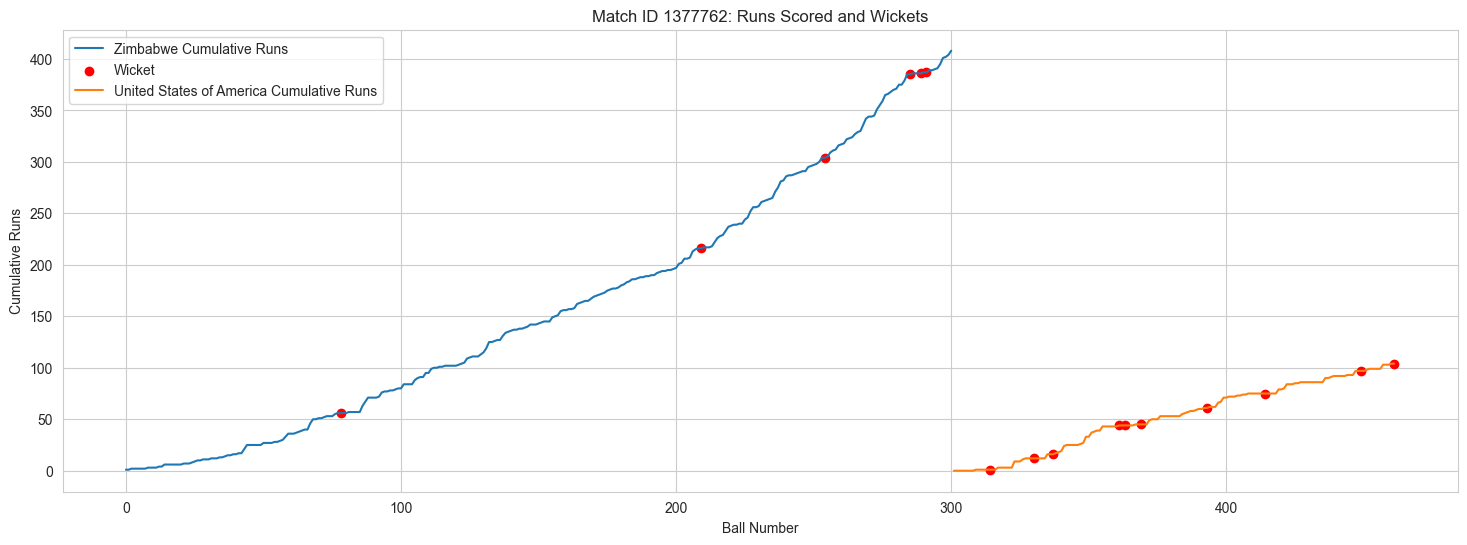

In [54]:
plot_match_runs_and_wickets(ids[2])

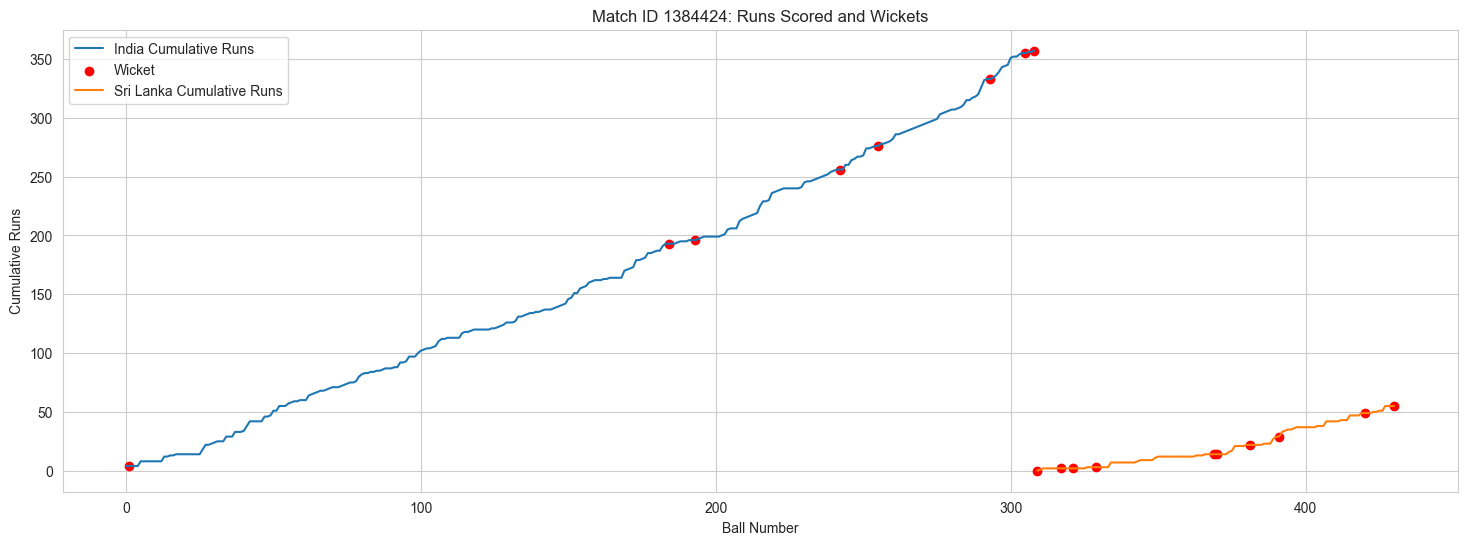

In [55]:
plot_match_runs_and_wickets(ids[3])

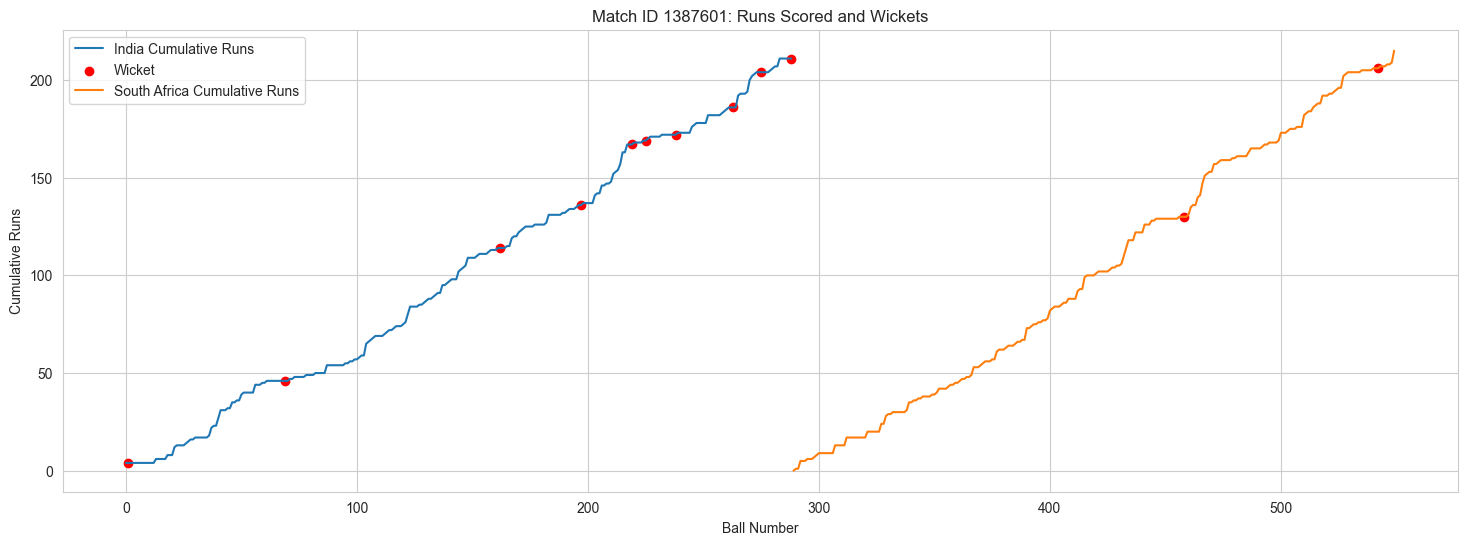

In [56]:
plot_match_runs_and_wickets(1387601)

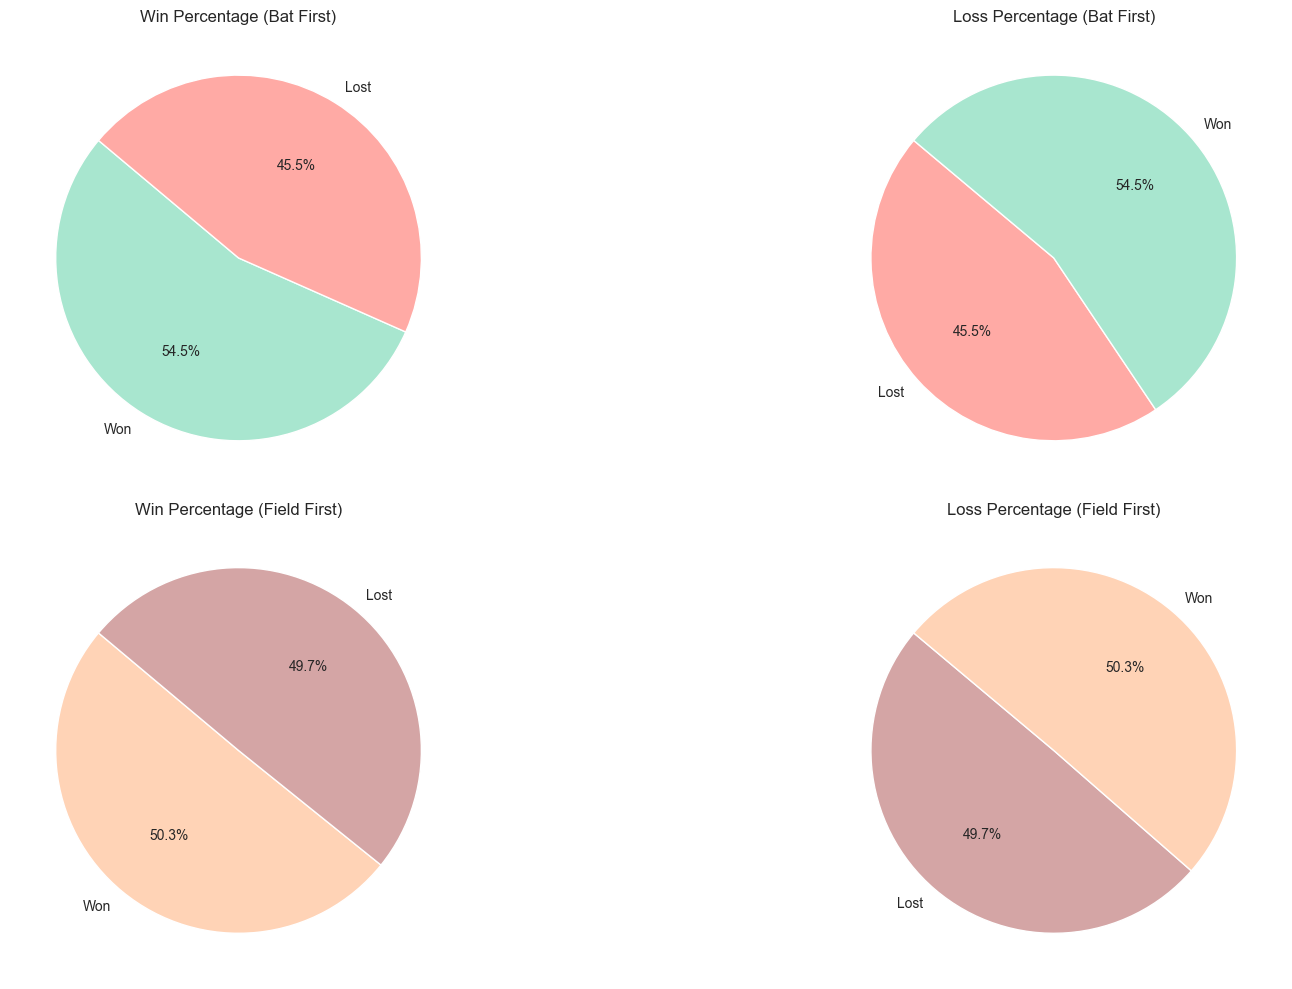

In [57]:
df['toss_winner_won'] = df['toss_winner'] == df['outcome_winner']

batting_stats = df[df['toss_decision'] == 'bat']['toss_winner_won'].value_counts(normalize=True) * 100
fielding_stats = df[df['toss_decision'] == 'field']['toss_winner_won'].value_counts(normalize=True) * 100

labels = ['Won', 'Lost']

bat_colors = ['#A8E6CF', '#FFAAA5']  # Light green & soft red
field_colors = ['#FFD3B6', '#D4A5A5']  # Soft peach & muted red

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].pie(batting_stats, labels=labels, autopct='%1.1f%%', colors=bat_colors, startangle=140)
axes[0, 0].set_title("Win Percentage (Bat First)")

axes[0, 1].pie(batting_stats[::-1], labels=labels[::-1], autopct='%1.1f%%', colors=bat_colors[::-1], startangle=140)
axes[0, 1].set_title("Loss Percentage (Bat First)")

axes[1, 0].pie(fielding_stats, labels=labels, autopct='%1.1f%%', colors=field_colors, startangle=140)
axes[1, 0].set_title("Win Percentage (Field First)")

axes[1, 1].pie(fielding_stats[::-1], labels=labels[::-1], autopct='%1.1f%%', colors=field_colors[::-1], startangle=140)
axes[1, 1].set_title("Loss Percentage (Field First)")

plt.tight_layout()
plt.show()

# Player data analysis

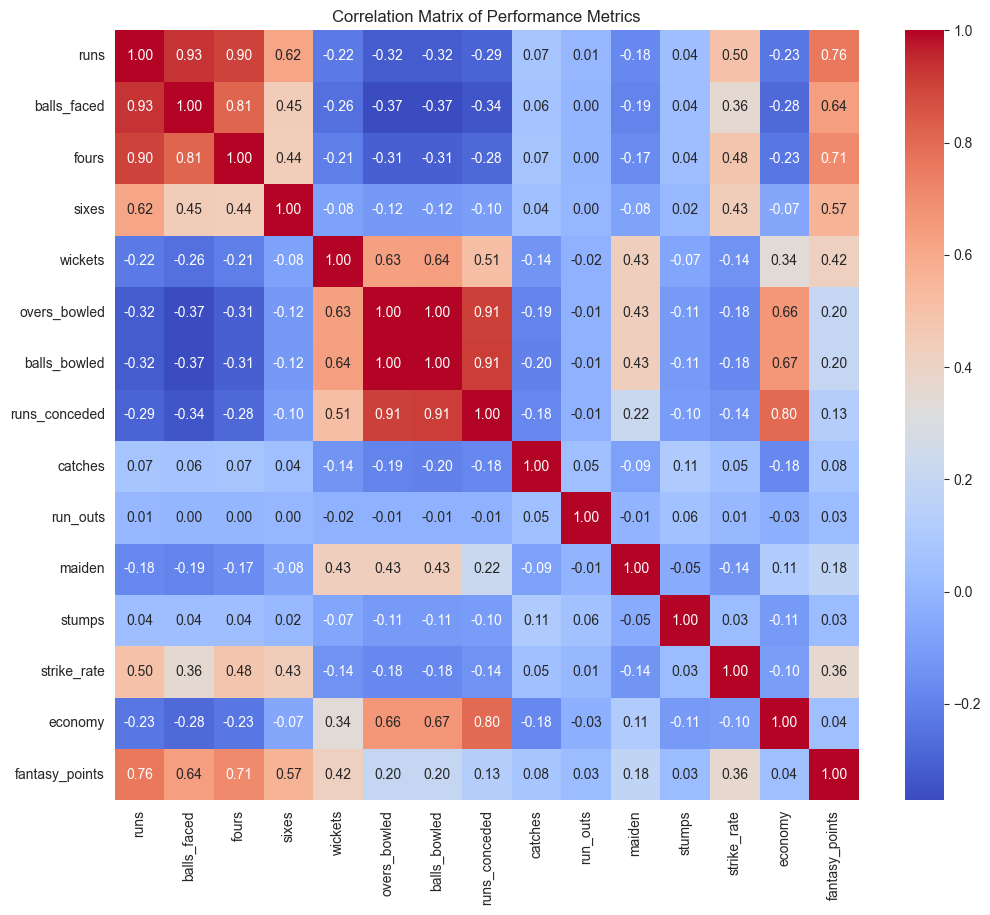

In [58]:
columns_of_interest = ["runs", "balls_faced", "fours", "sixes", "wickets", "overs_bowled",
                       "balls_bowled", "runs_conceded", "catches", "run_outs", "maiden",
                       "stumps", "strike_rate", "economy", "fantasy_points"]

corr_matrix = players_detailed_stats[columns_of_interest].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Performance Metrics")
plt.show()

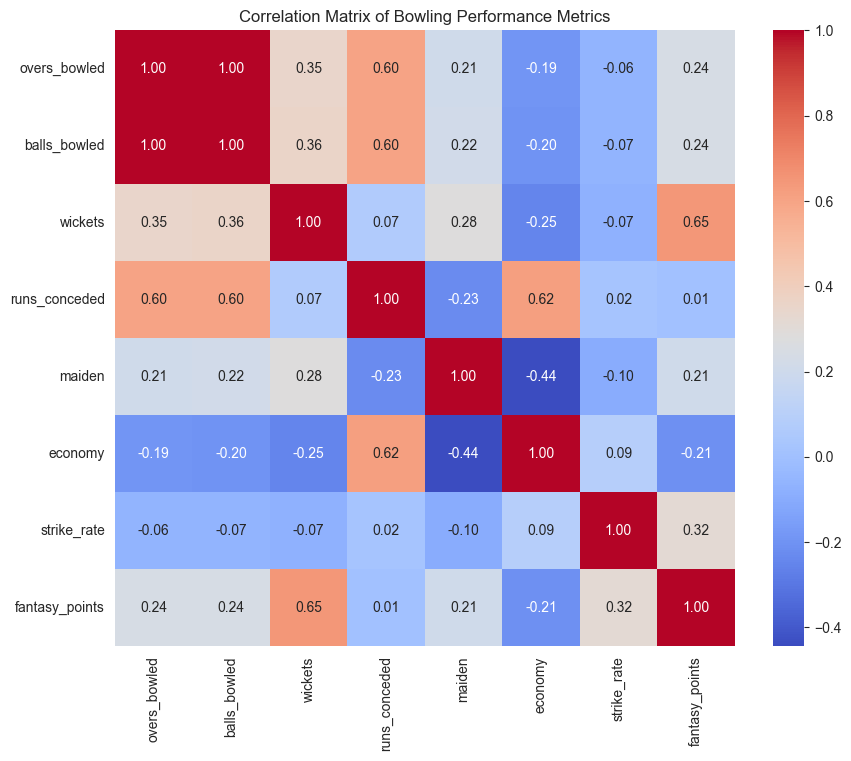

In [59]:
bowlers_stats = players_detailed_stats[players_detailed_stats["overs_bowled"] > 2]
bowling_columns = ["overs_bowled", "balls_bowled", "wickets", "runs_conceded", 
                   "maiden", "economy", "strike_rate", "fantasy_points"]
corr_matrix_bowlers = bowlers_stats[bowling_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_bowlers, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Bowling Performance Metrics")
plt.show()

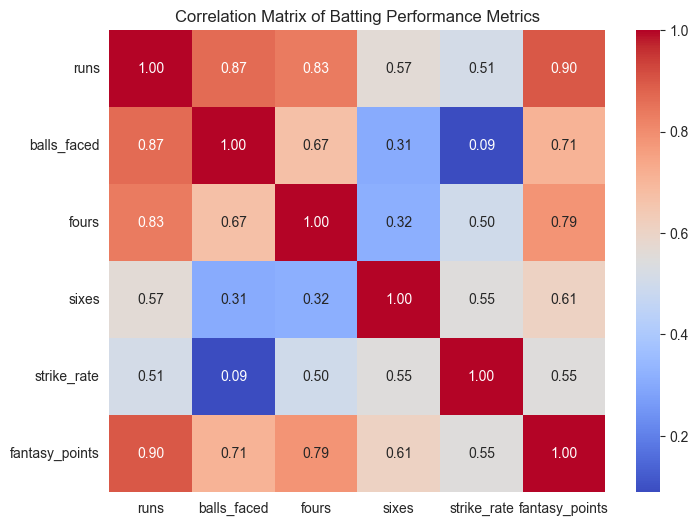

In [60]:
batsmen_stats = players_detailed_stats[players_detailed_stats["balls_faced"] > 20]
batting_columns = ["runs", "balls_faced", "fours", "sixes", "strike_rate", "fantasy_points"]

corr_matrix_batsmen = batsmen_stats[batting_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_batsmen, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Batting Performance Metrics")
plt.show()